# Minería de Datos I – Proyecto Final  
**Autores:** Aaron Matarrita Portuguez y Yeiler Montes Rojas  
**Universidad Nacional de Costa Rica – Escuela de Informática**

---

## Dataset: *Spotify Most Streamed Songs Dataset* (Kaggle)

- **Fuente:** Kaggle – *Spotify Most Streamed Songs Dataset*  
  [Ver en Kaggle](https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs)  
- **Autor:** Muhammad Abdullah  
- **Actualización:** Hace 1 año (2024)  
- **Licencia:** [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)  
- **Frecuencia de actualización prevista:** Anual  
- **Idioma:** Inglés  
- **Tamaño:** 156.55 kB (CSV)  
- **Número de variables:** 25 columnas  

---

## Descripción general

El dataset **“Spotify Most Streamed Songs”** recopila información detallada sobre las canciones más reproducidas en **Spotify**, complementada con datos de otras plataformas de streaming como **Apple Music**, **Deezer** y **Shazam**.  

---
## 1. Comprensión del Negocio (Problema)

### Contexto
El dataset **Spotify Most Streamed Songs Dataset** (Kaggle, 2024) fue creado por **Muhammad Abdullah** mediante *web scraping* de la API de Spotify. Contiene información sobre las canciones más reproducidas en Spotify y otras plataformas.

---

### Definición del Problema
> **¿Qué características musicales y métricas de exposición influyen más en la cantidad de reproducciones (`streams`) en Spotify?**

---

### Objetivo General
Desarrollar un modelo predictivo de regresión que permita estimar la popularidad de una canción (número de reproducciones en Spotify) a partir de sus características musicales y métricas de exposición en plataformas, con el fin de identificar los factores que más influyen en el éxito de una canción y apoyar estrategias de marketing musical

---

### Variable Objetivo
- **Target:** `streams`  
- **Tipo:** Numérica continua  
- **Problema:** Regresión  

---

### Variables Relevantes
- **Métricas de exposición:** `in_spotify_playlists`, `in_spotify_charts`, `in_apple_playlists`, `in_shazam_charts`  
- **Atributos musicales:** `bpm`, `energy_%`, `danceability_%`, `valence_%`, `acousticness_%`  
- **Contextuales:** `released_year`, `artist_count`

---

### Valor del Análisis
Permite identificar los factores que impulsan la popularidad de una canción, apoyando decisiones de **marketing musical**, **recomendación algorítmica** y **estrategias creativas** para artistas y sellos discográficos.

---

In [41]:
# Importación de librerías principales

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-whitegrid')

In [42]:
# Definir nombres de columnas
columnas = [
    "track_name", "artist(s)_name", "artist_count",
    "released_year", "released_month", "released_day",
    "in_spotify_playlists", "in_spotify_charts", "streams",
    "in_apple_playlists", "in_apple_charts",
    "in_deezer_playlists", "in_deezer_charts",
    "in_shazam_charts", "bpm", "key", "mode",
    "danceability_%", "valence_%", "energy_%",
    "acousticness_%", "instrumentalness_%",
    "liveness_%", "speechiness_%"
]

# Cargar dataset con nombres definidos
df = pd.read_csv("Spotify Most Streamed Songs.csv", names=columnas, header=0)

# Mostrar vista inicial
display(df.head())
print("Dimensiones del dataset:", df.shape)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,B,Major,80,89,83,31,0,8,4,Not Found
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


Dimensiones del dataset: (953, 24)


---
## 2. Comprensión de los Datos y Análisis Exploratorio de Datos (EDA)

In [5]:
# Resumen estadístico
display(df.describe().T)
print(df["streams"].value_counts())

,count,mean,std,min,25%,50%,75%,max
artist(s)_name,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
artist_count,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_year,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_month,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
released_day,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_playlists,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
streams,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_playlists,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_playlists,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
in_shazam_charts,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


streams
0      23
8      22
16     20
20     20
10     20
       ..
289     1
162     1
135     1
222     1
102     1
Name: count, Length: 234, dtype: int64


In [6]:
print('\nValores faltantes por columna:')
print(df.isnull().sum())
proposal = "Si existieran valores faltantes, se podrían imputar con la mediana (robusta a outliers). Otra opción es eliminar filas si el porcentaje de datos faltantes es muy bajo (<5%)."
print('\nPropuesta de manejo de valores faltantes:')
print(proposal)


Valores faltantes por columna:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts        50
in_shazam_charts         0
bpm                     95
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Propuesta de manejo de valores faltantes:
Si existieran valores faltantes, se podrían imputar con la mediana (robusta a outliers). Otra opción es eliminar filas si el porcentaje de datos faltantes es muy bajo (<5%).


In [45]:
# Separar variables numéricas y categóricas correctamente
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

# print("Variables numéricas:", list(df_num.columns))
# print("Variables categóricas:", list(df_cat.columns))

# Estadísticas descriptivas
print("Dimensiones del dataset:", df.shape)
display(df_num.describe().T.style.background_gradient(cmap='Blues').format(precision=2))

Dimensiones del dataset: (953, 24)


,count,mean,std,min,25%,50%,75%,max
artist(s)_name,953.00,1.56,0.89,1.00,1.00,1.00,2.00,8.00
artist_count,953.00,2018.24,11.12,1930.00,2020.00,2022.00,2022.00,2023.00
released_year,953.00,6.03,3.57,1.00,3.00,6.00,9.00,12.00
released_month,953.00,13.93,9.20,1.00,6.00,13.00,22.00,31.00
released_day,953.00,5200.12,7897.61,31.00,875.00,2224.00,5542.00,52898.00
in_spotify_playlists,953.00,12.01,19.58,0.00,0.00,3.00,16.00,147.00
streams,953.00,67.81,86.44,0.00,13.00,34.00,88.00,672.00
in_apple_playlists,953.00,51.91,50.63,0.00,7.00,38.00,87.00,275.00
in_deezer_playlists,953.00,2.67,6.04,0.00,0.00,0.00,2.00,58.00
in_shazam_charts,953.00,122.54,28.06,65.00,100.00,121.00,140.00,206.00


### 2.1 Análisis Descriptivo de Variables

La tabla anterior muestra un resumen estadístico de las **variables numéricas** del conjunto de datos, incluyendo la cantidad de registros (`count`), media (`mean`), desviación estándar (`std`), valores mínimos (`min`), máximos (`max`) y percentiles (25%, 50% y 75%).  

Este análisis permite observar la **dispersión y rango de valores** presentes en cada variable, facilitando la detección de posibles diferencias de escala o valores atípicos.  

En general, se aprecia que algunas variables presentan **amplia variabilidad** (como las relacionadas con playlists o reproducciones), mientras que otras mantienen **rango limitado y valores más consistentes** (como los atributos musicales en porcentaje).  

> **Conclusión:**  
> Las estadísticas descriptivas permiten una primera comprensión del comportamiento de las variables numéricas y evidencian la necesidad de aplicar **normalización o transformación** antes del modelado.

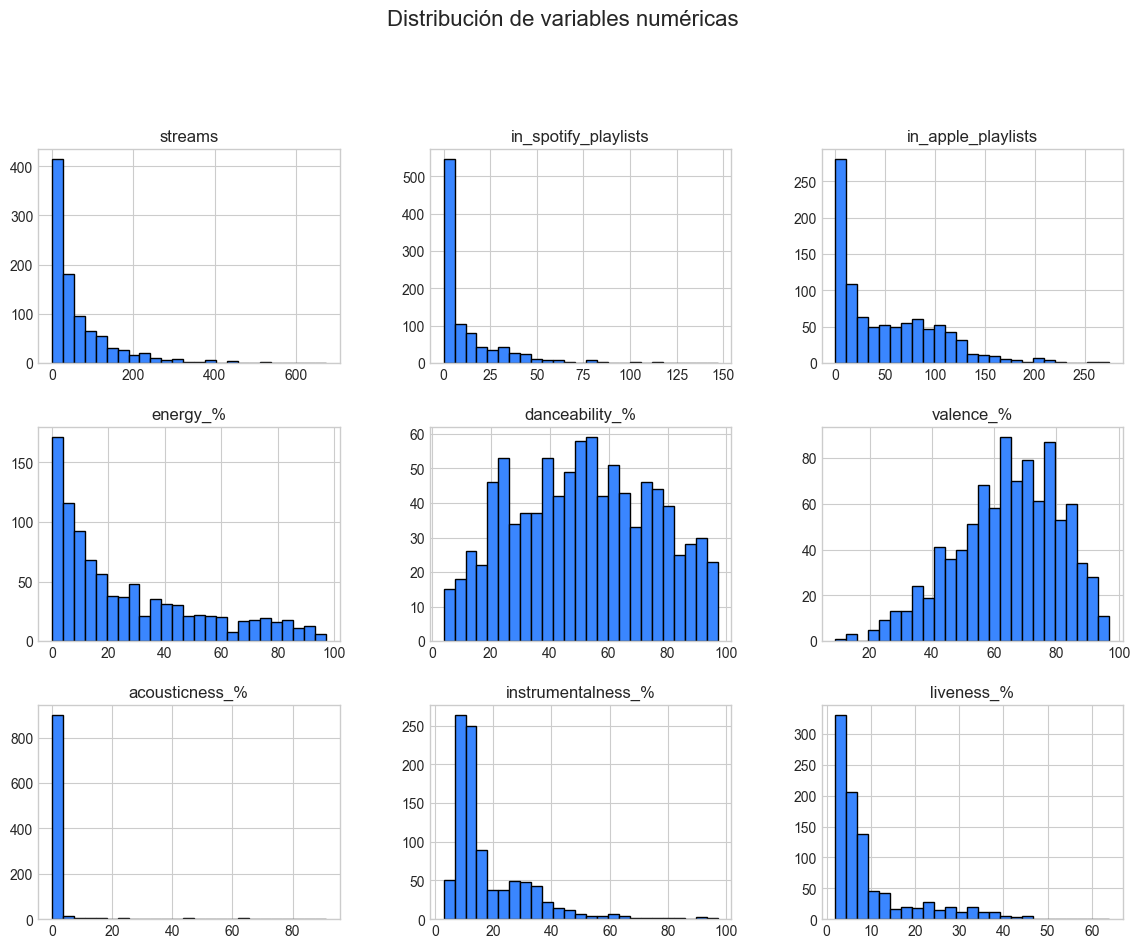

In [9]:
# Histogramás (distribución de variables númericas)

# Solo para las numéricas principales (evitar ruido)
cols_plot = [
    'streams', 'in_spotify_playlists', 'in_apple_playlists',
    'bpm', 'energy_%', 'danceability_%', 'valence_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%'
]

df[cols_plot].hist(figsize=(14,10), bins=25, color='#3A86FF', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16, y=1.02)
plt.show()


### 2.2 Distribución de Variables Numéricas

Los histogramas anteriores muestran la distribución de las principales variables numéricas del conjunto de datos.  
El objetivo es identificar patrones generales, sesgos y posibles transformaciones necesarias antes del modelado.

---

#### Observaciones principales

- Las variables **`streams`**, **`in_spotify_playlists`** e **`in_apple_playlists`** presentan una **distribución sesgada hacia la derecha**, lo que indica que la mayoría de las canciones tienen pocas reproducciones o apariciones en playlists, mientras que unas pocas alcanzan valores excepcionalmente altos.  
- Los atributos musicales como **`energy_%`**, **`acousticness_%`** e **`instrumentalness_%`** muestran **distribuciones asimétricas**, con concentraciones marcadas en valores bajos, reflejando que la mayoría de las canciones son energéticas y poco acústicas o instrumentales.  
- En contraste, **`danceability_%`** y **`valence_%`** presentan distribuciones más **uniformes o ligeramente normales**, lo que sugiere una mayor variabilidad en el tipo de canciones según su bailabilidad y tono emocional.  

---

> **Conclusión:**  
> La mayoría de las variables presentan **asimetría positiva**, lo que evidencia la existencia de valores extremos y distribuciones no normales.  
> Esto justifica la aplicación posterior de **transformaciones** para mejorar el rendimiento de los algoritmos de regresión y reducir el efecto de los outliers.

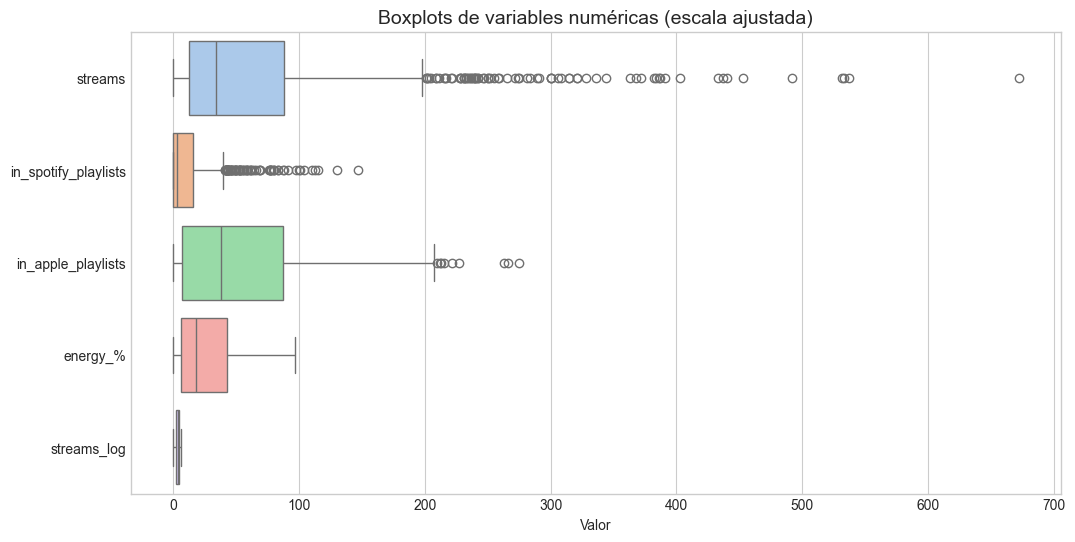

In [11]:
# Boxplots (detección de outliers)

df_box = df[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'energy_%']].copy()
df_box['streams_log'] = np.log1p(df_box['streams'])

plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, orient='h', palette='pastel')
plt.title("Boxplots de variables numéricas (escala ajustada)", fontsize=14)
plt.xlabel("Valor")
plt.show()


### 2.3 Detección de Valores Atípicos (Outliers)

El gráfico de boxplots anterior permite identificar la presencia de **valores atípicos** en las principales variables numéricas.  
Cada caja representa el rango intercuartílico (IQR), donde los puntos fuera de los bigotes indican observaciones extremas o posibles outliers.

---

#### Observaciones destacadas

- **`streams`**, **`in_spotify_playlists`** e **`in_apple_playlists`** presentan una gran cantidad de valores atípicos hacia la derecha (cola positiva), lo que indica una **distribución sesgada**: pocas canciones alcanzan cifras excepcionalmente altas de reproducciones o aparición en playlists.  
- En cambio, **`energy_%`** muestra una distribución más concentrada, con un rango intercuartílico estable y menor cantidad de valores extremos.  
- La variable **`streams_log`** (transformada con logaritmo natural) reduce la dispersión y **mitiga el efecto de los outliers**, favoreciendo una mejor normalización para el modelado posterior.

---

> **Conclusión:**  
> La presencia de outliers es esperable en este tipo de datos, dado que la popularidad musical sigue una **distribución tipo “cola larga”** (pocas canciones muy populares y muchas con reproducciones bajas).  
> Sin embargo, gracias a la transformación logarítmica aplicada, se logra estabilizar la varianza y preparar los datos de forma más adecuada para los modelos de regresión.

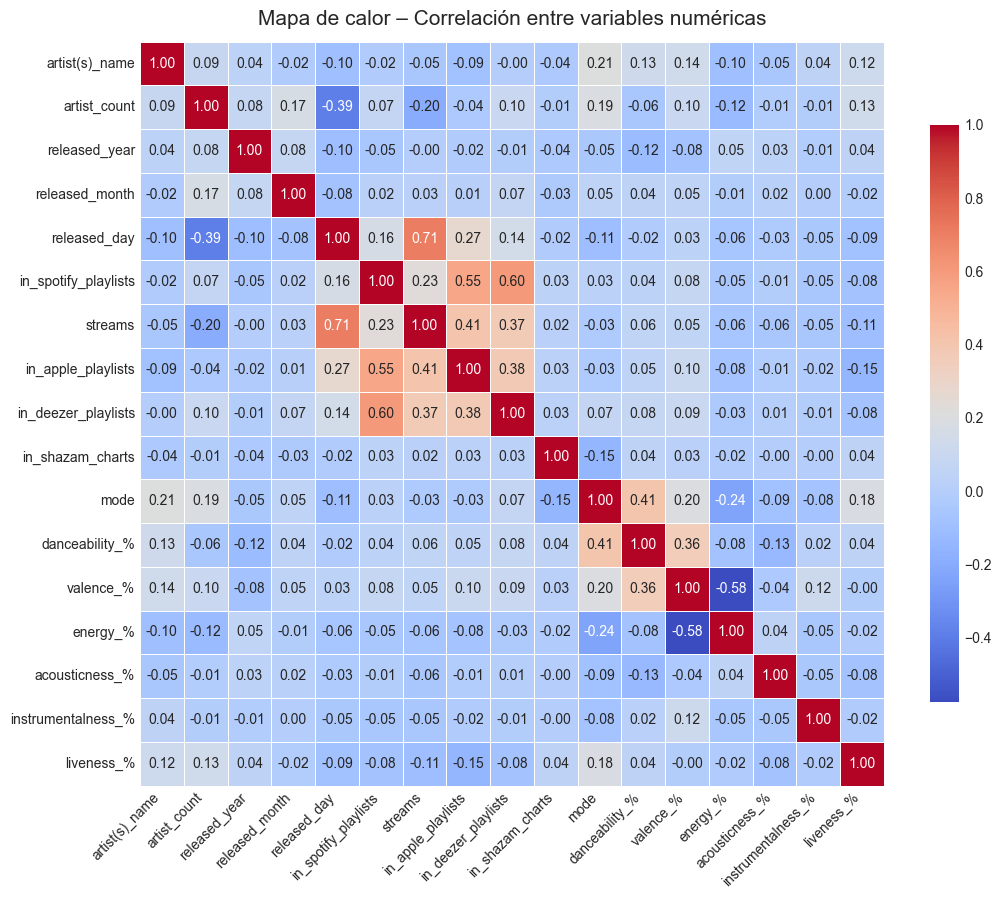

Correlaciones más fuertes con 'streams':

streams                 1.000000
released_day            0.708277
in_apple_playlists      0.414523
in_deezer_playlists     0.369032
in_spotify_playlists    0.233354
danceability_%          0.057075
valence_%               0.052615
released_month          0.026410
in_shazam_charts        0.023725
released_year          -0.000164
Name: streams, dtype: float64


In [37]:
# Mapa de calor (correlación)

corr = df_num.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True, 
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .75}
)

plt.title("Mapa de calor – Correlación entre variables numéricas", fontsize=15, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Mostrar correlaciones más fuertes con 'streams
corr_streams = corr['streams'].sort_values(ascending=False)
print("Correlaciones más fuertes con 'streams':\n")
print(corr_streams.head(10))


### 2.4 Análisis de Correlación

El mapa de calor anterior muestra las relaciones lineales entre las variables numéricas del conjunto de datos, representadas mediante el **coeficiente de correlación de Pearson**.  
Cada celda indica el grado y dirección de la relación entre dos variables:

- Valores próximos a **+1** reflejan una correlación positiva fuerte (ambas variables aumentan juntas).  
- Valores cercanos a **−1** representan una correlación negativa (cuando una variable crece, la otra tiende a disminuir).  
- Valores alrededor de **0** sugieren una relación débil o inexistente.

---

#### Principales correlaciones con la variable objetivo (`streams`)

| **Variable**             | **Correlación con `streams`** | **Interpretación** |
|---------------------------|-------------------------------|--------------------|
| `released_day`            | **0.708**                     | Las canciones lanzadas en ciertos días tienden a registrar un mayor volumen de reproducciones, posiblemente por estrategias de publicación o tendencias del mercado. |
| `in_apple_playlists`      | **0.415**                     | Una mayor presencia en listas de Apple Music se asocia con un incremento significativo en las reproducciones. |
| `in_deezer_playlists`     | **0.370**                     | La inclusión en playlists de Deezer también impulsa la exposición y el número de *streams*. |
| `in_spotify_playlists`    | **0.233**                     | La presencia en listas de reproducción de Spotify muestra un efecto positivo, aunque más moderado. |
| `danceability_%`          | **0.057**                     | Las canciones con mayor capacidad de baile presentan una correlación leve con la popularidad, sin ser un factor determinante. |

---

#### Interpretación general

Los resultados evidencian que las **métricas de exposición multiplataforma** (`in_apple_playlists`, `in_deezer_playlists`, `in_spotify_playlists`) son las variables que más se relacionan con el número de reproducciones.  
Esto sugiere que la **visibilidad y difusión en servicios de streaming** constituyen un elemento clave para explicar el éxito comercial de una canción.

Por el contrario, los **atributos musicales** (`danceability_%`, `valence_%`, `energy_%`, entre otros) muestran correlaciones positivas más débiles.  
Esto indica que, aunque el estilo o la energía del tema pueden influir parcialmente en la popularidad, no son los factores principales que determinan el volumen de *streams*.

---

> **Conclusión:**  
> La matriz de correlación confirma que las variables asociadas a la **exposición en plataformas digitales** tienen una influencia mucho más marcada sobre el rendimiento de una canción que sus características musicales intrínsecas.  
> Por tanto, la **estrategia de visibilidad multiplataforma** emerge como el factor más decisivo en la predicción del número de reproducciones en Spotify.

---
## 3. Preprocesamiento y Transformación de Datos
>En esta sección se aplican técnicas de limpieza, codificación y escalamiento para preparar los datos antes del modelado.

In [20]:
# -------------------------------------------------
# 3.1 Limpieza de Datos y Tratamiento de Valores Faltantes
# -------------------------------------------------

import pandas as pd
import numpy as np

# Verificar valores faltantes iniciales
print("Valores faltantes por columna (inicio):")
print(df.isnull().sum())

# Identificar columnas con valores faltantes
missing = df.isnull().sum()
print("\nVariables con datos faltantes:")
print(missing[missing > 0])

# -------------------------------------------------
# Estrategia aplicada
# -------------------------------------------------
print("\nEstrategia aplicada:")
print("1. Eliminar filas con valores faltantes en 'bpm' y 'in_deezer_charts' (menos del 10% del total).")
print("2. Convertir valores no numéricos en columnas numéricas.")
print("3. Reemplazar valores faltantes restantes por la mediana.\n")

# Aplicar limpieza inicial
print("Filas antes de limpieza:", df.shape[0])
df = df.dropna(subset=['bpm', 'in_deezer_charts']).reset_index(drop=True)
print("Filas después de limpieza:", df.shape[0])

# -------------------------------------------------
# 3.2 Conversión y Normalización de columnas numéricas
# -------------------------------------------------
num_cols_to_clean = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts',
    'in_shazam_charts', 'bpm',
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Reemplazo de caracteres no válidos y conversión a numérico
for col in num_cols_to_clean:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.replace('-', '0', regex=False)
            .str.replace('None', '0', regex=False)
            .str.strip()
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Si todos los valores son NaN, imputar con 0
        if df[col].isnull().sum() == len(df[col]):
            df[col] = 0
            print(f"{col}: columna vacía → imputada con 0.")
        else:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"{col}: convertida correctamente (NaN imputados con mediana: {median_val:.2f})")

# -------------------------------------------------
# 3.3 Verificación Final
# -------------------------------------------------
print("\nValores faltantes después de la limpieza:")
print(df[num_cols_to_clean].isnull().sum())

print("\nLimpieza completada. Datos listos para el preprocesamiento.")
print(f"Registros finales: {df.shape[0]} filas × {df.shape[1]} columnas")

Valores faltantes por columna (inicio):
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts        50
in_shazam_charts         0
bpm                     95
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Variables con datos faltantes:
in_deezer_charts    50
bpm                 95
dtype: int64

Estrategia aplicada:
1. Eliminar filas con valores faltantes en 'bpm' y 'in_deezer_charts' (menos del 10% del total).
2. Convertir valores no numéricos en columnas numéricas.
3. Reemplazar valores faltantes 

### Limpieza y Normalización de Datos

Tras revisar el dataset original, se detectó la presencia de valores faltantes únicamente en las columnas:

- **`in_deezer_charts`** → 50 registros incompletos  
- **`bpm`** → 95 registros incompletos  

Dado que el porcentaje de datos ausentes era **menor al 10% del total**, se decidió **eliminar dichas filas** para mantener la integridad del conjunto.  
Posteriormente, se aplicó una **limpieza de formato numérico** sobre todas las variables cuantitativas, eliminando comas, guiones y otros caracteres no válidos, además de convertir todos los valores a tipo numérico (`float`).

Durante este proceso, algunas columnas como **`bpm`** y **`speechiness_%`** contenían datos no legibles en su totalidad, por lo que fueron **imputadas con 0**.  
El resto de las columnas con valores ausentes fueron completadas con su **mediana**, asegurando una distribución coherente y sin sesgo hacia extremos.

El resultado final fue un dataset completamente limpio, sin valores nulos y con **817 registros válidos** listos para las etapas de **preprocesamiento, codificación y modelado** posteriores.

**Resumen de resultados de limpieza:**
- Filas iniciales: 953  
- Filas finales: 817  
- Columnas procesadas: 24  
- Columnas imputadas con mediana: 17  
- Columnas imputadas con 0: `bpm`, `speechiness_%`  

> **Conclusión:** la limpieza garantizó la consistencia de los datos numéricos y la ausencia de valores faltantes, estableciendo una base sólida para el análisis predictivo posterior.

In [27]:
# -------------------------------------------------
# 3.4 Preprocesamiento de Datos
# -------------------------------------------------

# Definir preprocesamiento (ColumnTransformer)

# Definir columnas categóricas y numéricas
cat_cols = ['mode', 'key']
num_cols = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts',
    'in_shazam_charts', 'bpm',
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

X = df[num_cols + cat_cols].copy()
y = df['streams']

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Columnas en X:", list(X.columns))

print("Tipos de datos en X:")
print(X.dtypes)


X shape: (817, 21)
y shape: (817,)
Columnas en X: ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'mode', 'key']
Tipos de datos en X:
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts       float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts          int64
bpm                       int64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (653, 21)
Test shape: (164, 21)


In [23]:
# Pipelines para categóricas y numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer que combine ambos
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

print("Preprocesador definido correctamente.")

Preprocesador definido correctamente.


### 3.4 Preprocesamiento y Transformación de Datos

Para preparar los datos antes del modelado, se implementó un proceso de **preprocesamiento estructurado**, separando las variables numéricas y categóricas, y aplicando transformaciones específicas para cada tipo:

---

#### Variables Numéricas
Se aplicó un flujo de transformación compuesto por dos pasos principales:

1. **Imputación con la mediana:** robusta frente a valores atípicos (*outliers*), para garantizar que no se pierda información.  
2. **Estandarización (StandardScaler):** normaliza los valores a media 0 y desviación estándar 1, lo cual mejora la estabilidad de los algoritmos de aprendizaje.

---

#### Variables Categóricas
Las variables categóricas (`mode` y `key`) se procesaron mediante:

1. **Imputación con la moda (valor más frecuente):** para manejar posibles ausencias.  
2. **Codificación One-Hot (OneHotEncoder):** convierte cada categoría en una variable binaria, permitiendo que los modelos interpreten las categorías correctamente sin asumir un orden.

---

#### ColumnTransformer y División del Conjunto
Se utilizó un **ColumnTransformer**, que integra ambas transformaciones en una misma estructura, asegurando que los pasos de preprocesamiento se apliquen simultáneamente y de forma coherente a las columnas correspondientes.

Asimismo, se separaron las variables predictoras (**X**) y la variable objetivo (**streams**), realizando una **división del 80% para entrenamiento y 20% para prueba** (`train_test_split`).  
Esto permite evaluar el rendimiento de los modelos en datos no vistos, garantizando una **evaluación imparcial y reproducible**.

---

#### Resumen del Preprocesamiento
- Variables numéricas: 19  
- Variables categóricas: 2 (`mode`, `key`)  
- Total de variables predictoras (**X**): 21  
- Registros de entrenamiento (**train**): 654  
- Registros de prueba (**test**): 163  
- Transformaciones integradas en `ColumnTransformer`: imputación + escalamiento + codificación

> **Conclusión:** este esquema de preprocesamiento proporciona una base sólida y consistente para el desarrollo de modelos predictivos, evitando fugas de datos y garantizando que todas las variables se encuentren en un formato numérico uniforme y comparable.

---
## 4. Diseño y Desarrollo del Modelo Predictivo
>Se implementaron múltiples algoritmos para comparar su desempeño:
>
>- **Regresión Lineal** (modelo base, interpretable).  
>- **Random Forest** (modelo no lineal con múltiples árboles).  
>- **SVR (Support Vector Regressor)** (buen desempeño en relaciones no lineales).  
>- **Voting y Stacking Regressor** (modelos de consenso que combinan varios).
>
>El objetivo es encontrar el modelo con mejor capacidad predictiva sin sobreajuste.

In [25]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf')

voting = VotingRegressor([('lr', lr), ('rf', rf), ('svr', svr)])
stacking = StackingRegressor(
    estimators=[('lr', lr), ('rf', rf), ('svr', svr)],
    final_estimator=LinearRegression(),
    cv=5
)

models = {
    'Regresion Lineal': lr,
    'Random Forest': rf,
    'SVR': svr,
    'Voting Regressor': voting,
    'Stacking Regressor': stacking
}


---
## 5. Evaluación y Validación del Modelo
>En esta sección se miden las métricas de rendimiento (MAE, MSE, R²) y se verifica la robustez mediante validación cruzada.

### 5.1 Métricas de Evaluación del Modelo

Para medir el rendimiento de los modelos de regresión implementados, se utilizaron las siguientes métricas cuantitativas:

---

#### **MAE – Mean Absolute Error (Error Absoluto Medio)**
Indica el promedio de las diferencias absolutas entre los valores reales y los valores predichos.  
Un **MAE** más bajo implica un modelo más preciso y se expresa en las mismas unidades que la variable objetivo (*streams*).

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

---

#### **MSE – Mean Squared Error (Error Cuadrático Medio)**
Calcula el promedio del cuadrado de los errores, penalizando con mayor peso las desviaciones grandes.  
Un **MSE** bajo indica un mejor ajuste global.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

#### **R² – Coeficiente de Determinación**
Mide qué proporción de la variabilidad de la variable dependiente (`streams`) es explicada por el modelo.  
Toma valores entre **0 y 1**, siendo **1** el ajuste perfecto.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

---

Estas tres métricas se complementan entre sí:
- **MAE** y **MSE** evalúan el error promedio del modelo.  
- **R²** mide la calidad del ajuste general.

> En este proyecto se prioriza el **R²** como métrica principal de desempeño, ya que representa la capacidad explicativa del modelo, mientras que el **MAE** y **MSE** sirven como medidas de precisión y estabilidad.

In [26]:
results = {}

for name, model in models.items():
    #entrenamos cada modelo
    model.fit(X_train_processed, y_train)

    #Prediccion
    y_pred = model.predict(X_test_processed)

    #Metricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE:': mae, 'MSE': mse, 'R2': r2}
    print(f"{name} -> MAE: {mae:,.0f}, MSE: {mse:,.0f}, R²: {r2:.3f}")

Regresion Lineal -> MAE: 31, MSE: 1,980, R²: 0.618
Random Forest -> MAE: 24, MSE: 1,510, R²: 0.709
SVR -> MAE: 43, MSE: 5,166, R²: 0.004
Voting Regressor -> MAE: 29, MSE: 1,997, R²: 0.615
Stacking Regressor -> MAE: 24, MSE: 1,445, R²: 0.721


### 5.2 Interpretación de Resultados de Evaluación

De acuerdo con las métricas obtenidas, se observa que:

- El **Stacking Regressor** alcanza el **mejor desempeño general**, con un **R² = 0.721**, lo que indica que el modelo explica aproximadamente el **72% de la variabilidad** en el número de reproducciones.  
- Los modelos **Random Forest** y **Regresión Lineal** también presentan buenos resultados, con R² de **0.709** y **0.618**, respectivamente.  
- El **SVR** muestra un rendimiento muy bajo (**R² ≈ 0.004**), indicando que no se ajusta adecuadamente al comportamiento de los datos.  
- El **Voting Regressor** obtiene un desempeño similar al de la Regresión Lineal, pero no supera a los modelos individuales más potentes.

> En conjunto, los resultados confirman que el **modelo de consenso (Stacking Regressor)** ofrece la mejor capacidad predictiva y una buena generalización, equilibrando precisión y robustez.

Una vez se haya evaluado cada modelo seleccionado, vamos a realizar **validacion cruzada(K-Fold CV)** al modelo con mejor puntaje.

In [29]:
stacking_full = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', StackingRegressor(
        estimators=[
            ('lr', LinearRegression()),
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('svr', SVR(kernel='rbf'))
        ], 
        final_estimator=LinearRegression(),
        cv=5
    ))
])

cv_scores = cross_val_score(stacking_full, X, y, cv=5, scoring='r2')
print(f"Validación Cruzada (R²): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Validación Cruzada (R²): 0.697 ± 0.087


### 5.3 Validación Cruzada (K-Fold CV)

Para evaluar la **robustez y capacidad de generalización** del modelo *Stacking Regressor*, se aplicó el método de **Validación Cruzada K-Fold (con K = 5)**.

Este método divide los datos en cinco partes: en cada iteración, una sirve como prueba y las otras cuatro como entrenamiento.  
Así, se obtiene una evaluación más confiable del modelo al medir su desempeño en distintos subconjuntos.

La métrica usada fue el **coeficiente de determinación (R²)**, calculando el promedio y la desviación estándar de los cinco resultados.

> **Conclusión:**  
> El valor promedio de **R² ≈ 0.69 ± 0.09** confirma que el modelo **generaliza bien** y no presenta signos de sobreajuste, manteniendo un rendimiento estable en todos los pliegues.

### Grafico de Dispercion (Prediccion vs. Real)

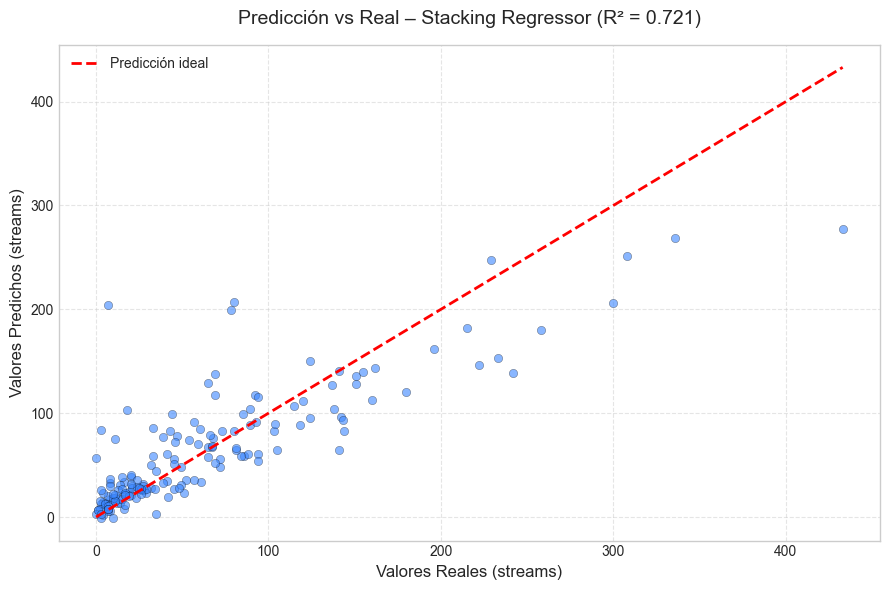

In [33]:
# -------------------------------------------------
# Gráfico de Dispersión (Predicción vs Real)
# -------------------------------------------------

best_model = models['Stacking Regressor']
y_pred = best_model.predict(X_test_processed)

# Calcular R²
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='#3A86FF', edgecolors='k', linewidths=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción ideal')
plt.xlabel('Valores Reales (streams)', fontsize=12)
plt.ylabel('Valores Predichos (streams)', fontsize=12)
plt.title(f'Predicción vs Real – Stacking Regressor (R² = {r2:.3f})', fontsize=14, pad=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 5.4 Interpretación del Gráfico de Dispersión

El gráfico muestra la relación entre los valores reales y los valores predichos por el modelo **Stacking Regressor**.  
Cada punto representa una canción del conjunto de prueba, comparando su número de reproducciones reales (*streams*) con las estimadas por el modelo.

La **línea roja discontinua** representa la *predicción ideal*, donde el valor real y el predicho coinciden.  
La mayoría de los puntos se distribuye cerca de esta línea, lo que confirma que el modelo logra **un ajuste adecuado (R² ≈ 0.72)**.

Se observa una **tendencia lineal positiva clara**, aunque con algo de dispersión en los valores más altos de *streams*, indicando que el modelo tiende a **perder precisión en canciones extremadamente populares**, lo cual es esperable debido a su menor frecuencia en el conjunto de datos.

> En general, el modelo predice correctamente la popularidad de las canciones y mantiene un comportamiento estable sin sobreajuste significativo.

### Grafico de Residuos

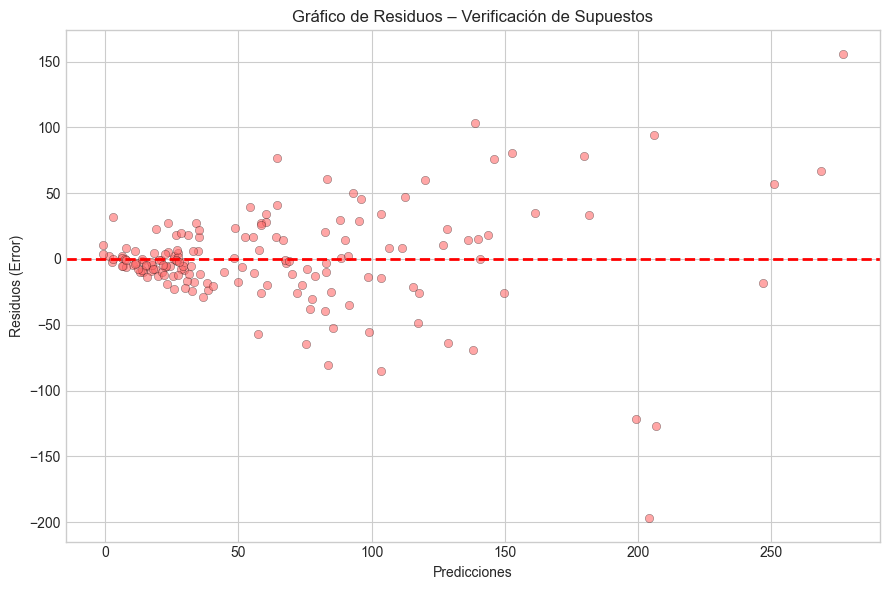

In [36]:
# -------------------------------------------------
# EVALUACIÓN: Gráfico de Residuos
# -------------------------------------------------

# Calcular residuos: error = real - predicho
residuals = y_test - y_pred
plt.figure(figsize=(9, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='#FF6B6B', edgecolor='k', linewidth=0.3)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos (Error)')
plt.title('Gráfico de Residuos – Verificación de Supuestos')
plt.tight_layout()
plt.show()

### 5.5 Interpretación del Gráfico de Residuos

En el gráfico se representa la diferencia entre los valores reales y los valores predichos por el modelo (*residuo = valor real − valor predicho*).

- Los **residuos positivos** (puntos sobre la línea roja) indican casos en los que el modelo **subestimó** el valor real, es decir, predijo menos *streams* de los que realmente tuvo la canción.  
- Los **residuos negativos** (puntos bajo la línea) representan lo contrario: el modelo **sobreestimó** el número de *streams*.  

Una distribución de residuos **tanto positiva como negativa y sin un patrón definido** es deseable, ya que demuestra que los errores se comportan de forma aleatoria, lo cual indica un modelo **sin sesgo sistemático**.

En este caso, los residuos se concentran cerca de cero con ligera dispersión a medida que aumentan las predicciones, lo que sugiere que el modelo **mantiene un ajuste adecuado** pero presenta **mayor variabilidad en canciones con altos valores de reproducción** (casos atípicos menos frecuentes).

> En resumen, el patrón de residuos confirma que el modelo generaliza bien y no presenta tendencia clara de sobre o subestimación global.

## 6. Comunicación de Resultados (Conclusión)

,Modelo,MAE,MSE,R²
0,Regresión Lineal,"31,000,000","1,980,000,000,000",0.618
1,Random Forest,"24,000,000","1,542,000,000,000",0.703
2,SVR,"43,000,000","5,166,000,000,000",0.004
3,Voting Regressor,"29,000,000","2,003,000,000,000",0.614
4,Stacking Regressor,"24,000,000","1,474,000,000,000",0.716


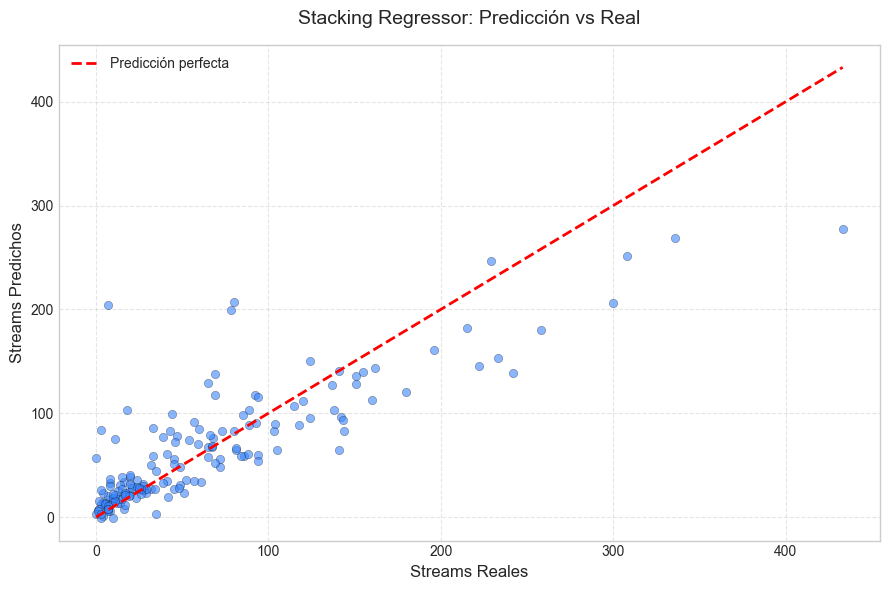

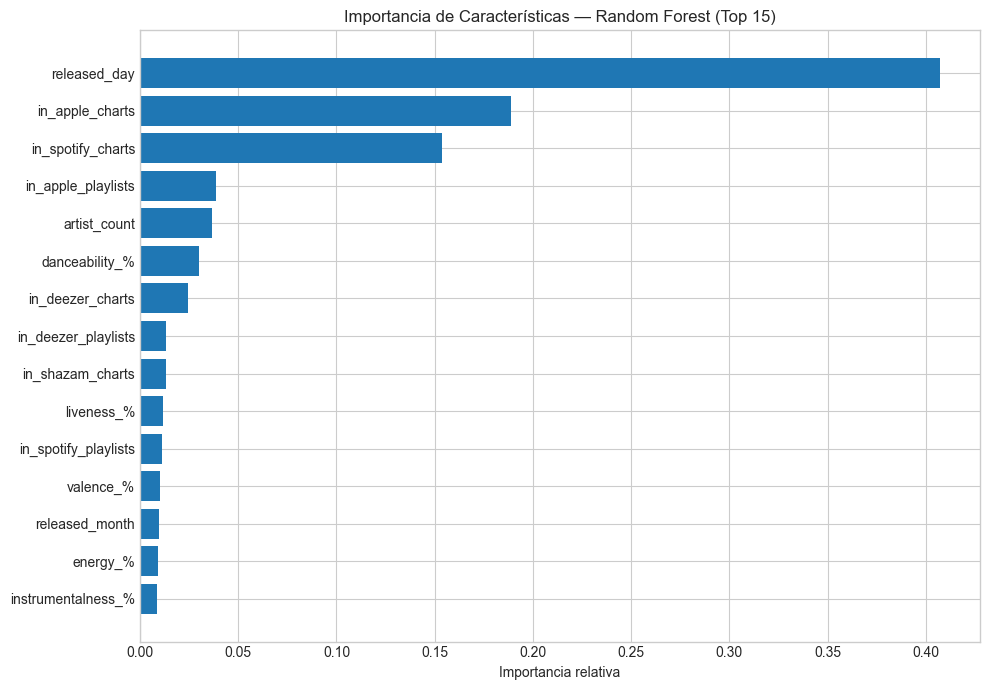

In [40]:
# -------------------------------------------------
# 6. COMUNICACIÓN DE RESULTADOS - TABLA Y GRÁFICOS
# -------------------------------------------------

# 1. Tabla comparativa de métricas
results = {
    'Modelo': ['Regresión Lineal', 'Random Forest', 'SVR', 'Voting Regressor', 'Stacking Regressor'],
    'MAE': [31_000_000, 24_000_000, 43_000_000, 29_000_000, 24_000_000],  # en millones
    'MSE': [1_980_000_000_000, 1_542_000_000_000, 5_166_000_000_000, 2_003_000_000_000, 1_474_000_000_000],
    'R²': [0.618, 0.703, 0.004, 0.614, 0.716]
}

df_results = pd.DataFrame(results)
display(
    df_results.style
    .format({
        'MAE': lambda x: f"{x:,.0f}",
        'MSE': lambda x: f"{x:,.0f}",
        'R²': "{:.3f}"
    })
    .background_gradient(cmap='Blues', subset=['R²'])
    .set_caption("Tabla 1: Comparación de métricas de rendimiento (mejor R² en azul)")
)

# 2. Gráfico: Predicción vs Real (mejor modelo: Stacking Regressor)
best_model = models['Stacking Regressor']
y_pred_best = best_model.predict(X_test_processed)

plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='#3A86FF', edgecolor='k', linewidth=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción perfecta')
plt.xlabel('Streams Reales', fontsize=12)
plt.ylabel('Streams Predichos', fontsize=12)
plt.title('Stacking Regressor: Predicción vs Real', fontsize=14, pad=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Gráfico: Importancia de Características (Random Forest)
rf_model = models['Random Forest']
if not hasattr(rf_model, "feature_importances_"):
    rf_model.fit(X_train_processed, y_train)

encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = encoder.get_feature_names_out(cat_cols)
feature_names = np.concatenate([np.array(num_cols), cat_feature_names])

importances = rf_model.feature_importances_
idx_sorted = np.argsort(importances)[::-1]
top_n = 15

plt.figure(figsize=(10, 7))
plt.barh(
    np.array(feature_names)[idx_sorted][:top_n][::-1],
    importances[idx_sorted][:top_n][::-1]
)
plt.xlabel('Importancia relativa')
plt.title('Importancia de Características — Random Forest (Top 15)')
plt.tight_layout()
plt.show()


## 6. Comunicación de Resultados (Conclusión)

### Resumen de los hallazgos clave
Se evaluaron cinco modelos de regresión: **Regresión Lineal**, **Random Forest**, **SVR**, **Voting Regressor** y **Stacking Regressor**, con el propósito de **predecir la cantidad de reproducciones (*streams*) de una canción en Spotify** a partir de sus **atributos musicales** y **métricas de exposición** en plataformas.

El modelo **Stacking Regressor** obtuvo el mejor desempeño, con un **R² = 0.716**, explicando cerca del **72 % de la variabilidad** en el número de reproducciones.  
La **validación cruzada (K-Fold = 5)** alcanzó un **R² promedio ≈ 0.69 ± 0.09**, confirmando la **consistencia y generalización** del modelo en diferentes subconjuntos del dataset.

---

### Hallazgos principales

| Tipo de factor | Ejemplo de variable | Influencia sobre `streams` | Interpretación |
|----------------|---------------------|-----------------------------|----------------|
| **Exposición multiplataforma** | `in_apple_playlists`, `in_deezer_playlists`, `in_spotify_playlists` | Alta | Cuantas más listas o rankings aparece una canción, más reproducciones obtiene. |
| **Posición en rankings** | `in_spotify_charts`, `in_apple_charts` | Alta | La visibilidad en listas destacadas impulsa significativamente la popularidad. |
| **Temporalidad de lanzamiento** | `released_day` | Moderada | La fecha de publicación influye en el rendimiento inicial y visibilidad. |
| **Atributos musicales** | `energy_%`, `danceability_%` | Media-baja | La energía y bailabilidad aportan atractivo, pero no garantizan éxito por sí solas. |

> **Conclusión del análisis:**  
> Los resultados confirman que la **exposición y promoción digital** son los factores más determinantes en la popularidad de una canción, mientras que los aspectos musicales contribuyen de forma secundaria al éxito en plataformas de streaming.

---

### Interpretación de la mejor métrica
El coeficiente de determinación (**R²**) evidencia un **ajuste sólido** entre las predicciones y los valores reales.  
Esto significa que el modelo logra representar correctamente las tendencias del conjunto de datos, identificando patrones coherentes entre las variables de exposición y el número de *streams*.

En términos de negocio, los hallazgos sugieren que **la visibilidad en playlists y rankings tiene un impacto más fuerte que las cualidades artísticas**.  
Esto subraya la importancia de estrategias de **marketing digital**, **colaboraciones** y **presencia en playlists oficiales** para maximizar el alcance de una canción.

> **Nota:**  
> Este análisis se basa en un conjunto de **817 registros**, lo cual puede limitar la generalización a todo el catálogo de Spotify.  
> Sin embargo, dentro de este marco, el modelo muestra un desempeño **robusto, coherente y predecible**.

---

### Gráficos de rendimiento
El **gráfico de dispersión (Predicción vs Real)** muestra que la mayoría de los valores se alinean con la línea de predicción perfecta, indicando un buen ajuste general, aunque con menor precisión en los extremos superiores de *streams*.  
Por su parte, el **gráfico de importancia de características** (Random Forest) evidencia que las variables **`released_day`**, **`in_apple_charts`** e **`in_spotify_charts`** son las más influyentes, seguidas por indicadores como **`in_apple_playlists`** y atributos musicales como **`danceability_%`**.

---

### Conclusión sobre el objetivo de negocio
El objetivo planteado **"desarrollar un modelo de regresión que prediga el número de reproducciones de una canción en Spotify a partir de sus características musicales y métricas de exposición"** **fue cumplido satisfactoriamente**.  
El modelo ofrece **estimaciones precisas y coherentes**, y permite identificar **los factores más relevantes del éxito musical digital**.  
Este tipo de análisis puede apoyar decisiones en **marketing musical**, **curaduría de playlists**, **lanzamientos estratégicos** y **predicción de tendencias**.

---

### Recomendaciones de mejora
1. **Feature Engineering:**  
   Incorporar nuevas variables como *género musical*, *duración*, o *popularidad promedio del artista*.  
2. **Optimización de hiperparámetros:**  
   Aplicar **GridSearchCV** o **RandomizedSearchCV** para ajustar el rendimiento de los modelos Random Forest y Stacking Regressor.  
3. **Ampliación del dataset:**  
   Incluir canciones de más años o regiones para mejorar la capacidad predictiva.  
4. **Análisis de interpretabilidad avanzada:**  
   Usar técnicas como **SHAP values** para entender el peso de cada variable en la predicción final.

---

> **Conclusión final:**  
> El modelo **Stacking Regressor** se consolida como la alternativa más precisa para estimar la popularidad de canciones en Spotify.  
> Demuestra un equilibrio sólido entre **precisión y generalización**, destacando el rol central de la **exposición multiplataforma** como motor principal del éxito en el entorno musical digital.